<a href="https://colab.research.google.com/github/BrandonKTC/Pytorch_Deep_learning/blob/main/04_PyTorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04 PyTorch Custom Datasets

## 0. Importing PyTorch and setting domaine agnostic code

In [1]:
import torch
from torch import nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-8b09c405-2fef-6a65-7849-1fff7cadcaf3)


## 1. Setup data

In [4]:
import requests, zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} doesn't exit, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, stteak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)
  zip_ref.close()

data/pizza_steak_sushi directory already exists... skipping download
Unzipping pizza, steak, sushi data...


## 2. Visualizing data

random image path: data/pizza_steak_sushi/test/sushi/887831.jpg 
image class: sushi 
image height 512 
image width 512 


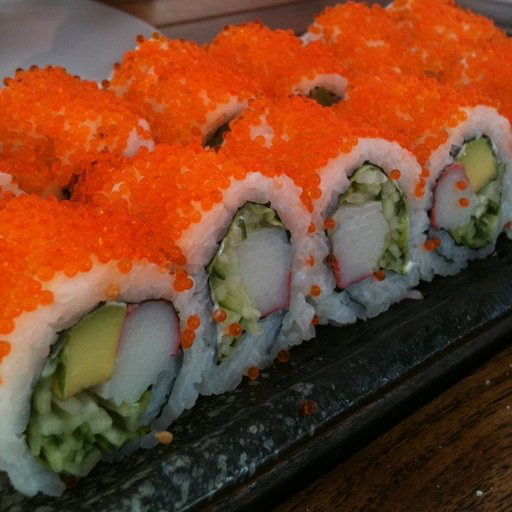

In [5]:
import random
from PIL import Image

# 1. Get all images paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print Metadata
print(f"random image path: {random_image_path} ")
print(f"image class: {image_class} ")
print(f"image height {img.height} ")
print(f"image width {img.width} ")
img

(512, 512, 3)

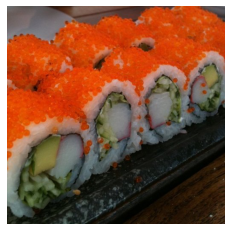

In [6]:
import matplotlib.pyplot as plt
import numpy as np

image = np.asarray(img)
plt.imshow(image)
plt.axis(False)
image.shape

## 3. Transforming data

In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [8]:
from matplotlib.transforms import Transform
# Write a transform for image
data_transform = transforms.Compose([
                                      # Resize our images to 64x64
                                      transforms.Resize(size=(64,64)),
                                      # Flip the images randomly on the horizontal
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      # Turn the image into a torch.Tensor
                                      transforms.ToTensor()                    
])

In [9]:
train_dir = data_path / "pizza_steak_sushi" / "train"
test_dir = data_path / "pizza_steak_sushi" / "test"

In [10]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [11]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [12]:
img, label = train_data[0][0], train_data[0][1]
img, class_names[label]

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

(-0.5, 63.5, 63.5, -0.5)

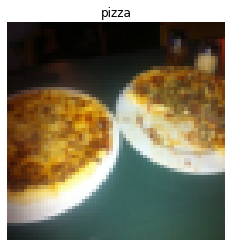

In [13]:
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

## 4.1 Turn images into `DataLoader`

In [14]:
import os
BATCH_SIZE = 1

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

len(train_dataloader), len(test_dataloader)

(225, 75)

In [15]:
img, label = next(iter(train_dataloader))
img.shape, label

(torch.Size([1, 3, 64, 64]), tensor([1]))

## 4.2 Turn our image into Tensor format without `DataLoader`

In [16]:
import os, pathlib, torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

### 4.2.1 Creating a helper function to get class names


In [17]:
target_dir = train_dir

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])
class_names_found

def find_classes(dir):
  """
  Finds the class folder names in a target directory
  """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(dir) if dir.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {dir}... please check file structure. ")

  # 3. Create a dictionary of index labels
  class_to_idx = {class_names: i for i, class_names in enumerate(classes)}

  return classes, class_to_idx

In [18]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 4.2.2 Create a custom `Dataset`to replicate `ImageFolder`

In [19]:
# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self, target_dir, transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.classes_to_idx = find_classes(target_dir)

    # 4. Create a function to load images
  def load_image(self, index):
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self):
    return len(self.paths)

  # 6. Overwrite --getitem__() to return a particular sample
  def __getitem__(self, index):
    "Returns one sample of data, data and label"
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.classes_to_idx[class_name]
  
    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [20]:
# Create a transform
train_tranforms = transforms.Compose([
                                      transforms.Resize((64, 64)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor()
])

test_transforms = transforms.Compose([transforms.Resize((64, 64)),
                                      transforms.ToTensor()
])

In [21]:
train_data_custom = ImageFolderCustom(
                                      train_dir,
                                      train_tranforms)
test_data_custom = ImageFolderCustom(
                                      test_dir,
                                      test_transforms)

len(train_data), len(train_data_custom)

(225, 225)

In [22]:
train_data_custom.classes_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

### 4.2.3 Function to display random images

In [23]:
def display_random_images(dataset, classes=None, n=10, display_shape=True, seed=None):
  # 2. Adjust display if n too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purposes, n shouldn't be larger than 10")

  # 3. sed the seed
  if seed:
    random.seed(seed)
  
  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0)

    # Plot adjustted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

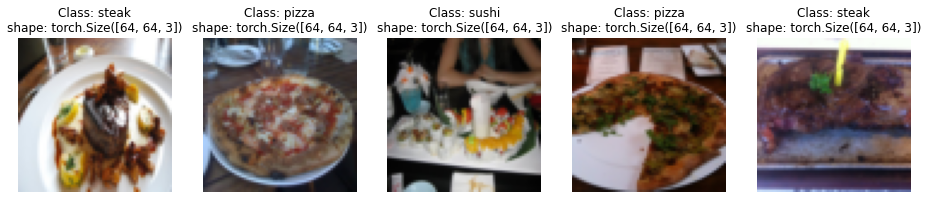

In [24]:
display_random_images(train_data_custom, n=5, classes=class_names, seed=None)

## 5. Turn custom loaded images into `DataLoader's`

In [25]:
BATCH_SIZE = 32

train_dataloader_custom = DataLoader(train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True)
test_dataloader_custom = DataLoader(test_data_custom,
                                    batch_size=BATCH_SIZE)

In [26]:
img, label = next(iter(train_dataloader_custom))

img.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other forms of transforms (data augmentation)

In [27]:
train_transform = transforms.Compose([
                                      transforms.Resize((224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()
])
test_transforms = transforms.Compose([transforms.Resize((224, 224)),
                                      transforms.ToTensor()
])

In [28]:
image_path_list = list(image_path.glob('*/*/*.jpg'))

In [29]:
import torchvision

BATCH_SIZE = 32
# Create simple transform
simple_transform = transforms.Compose([transforms.Resize((64,64)),
                                       transforms.ToTensor()])

# Load and transform data
simple_train = torchvision.datasets.ImageFolder(root=train_dir,
                                       transform=simple_transform)
simple_test = torchvision.datasets.ImageFolder(test_dir,
                                               simple_transform)

# 2 Turn datasets into Dataloader
simple_train_dataloader = torch.utils.data.DataLoader(simple_train,
                                                      BATCH_SIZE)
simple_test_dataloader = torch.utils.data.DataLoader(simple_test,
                                                     BATCH_SIZE)


## Model_0: baseline whitout data_augmentation

In [30]:
class TinyVGGModel(nn.Module):
  def __init__(self, input_channel, hidden_channel, output_layer):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(input_channel, hidden_channel, kernel_size=3,padding=0),
        nn.ReLU(),
        nn.Conv2d(hidden_channel, hidden_channel, kernel_size=3, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_channel, hidden_channel, kernel_size=3,padding=0),
        nn.ReLU(),
        nn.Conv2d(hidden_channel, hidden_channel, kernel_size=3, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_channel*13*13, output_layer)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)

    return x


In [31]:
model_0 = TinyVGGModel(3, 10, len(class_names)).to(device)
model_0

TinyVGGModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [32]:
# Get a single image batch
image_batch, label_batch = next(iter(simple_train_dataloader))

# Try a forward pass
model_0.eval()
with torch.inference_mode():
  y_pred = model_0(image_batch.to(device))
y_pred.shape

torch.Size([32, 3])

In [33]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary

summary(model_0, input_size=(1, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModel                             [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [34]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
from helper_functions import accuracy_fn

--2022-07-16 16:47:57--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9569 (9.3K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]   9.34K  --.-KB/s    in 0s      

2022-07-16 16:47:57 (79.6 MB/s) - ‘helper_functions.py.2’ saved [9569/9569]



In [35]:
def train(data_loader, model, loss_fn, optimizer):
  train_loss, train_acc = 0, 0
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    model.train()
    # Forward
    y_pred = model(X)
    # Loss / Acc
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    # optimizer
    optimizer.zero_grad()
    # loss
    loss.backward()
    # optim
    optimizer.step()
    # Calculate accuracy metric
    train_labels = y_pred.argmax(dim=1)
    train_acc += (train_labels == y).sum().item()/len(y_pred)
    if batch % 2 == 0:
      print(f"Looked at {batch * len(X)} / {len(data_loader.dataset)} samples. ")
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  return train_loss, train_acc

def test(data_loader, model, loss_fn, optimizer):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      # Forward
      test_pred = model(X_test)
      # Loss / Acc
      loss = loss_fn(test_pred, y_test)
      test_loss += loss.item()
      test_pred_labels = test_pred.argmax(1)
      test_acc += (test_pred_labels == y_test).sum().item()/len(test_pred_labels)
    # Printing
  test_loss /= len(data_loader)
  test_acc /= len(data_loader)

  return test_loss, test_acc



In [36]:
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.001)

In [37]:
def train_model(traindataloader, testdataloader, model, optimizer, epochs=5, loss_fn=nn.CrossEntropyLoss()):

  results = {
    "train_loss": [],
    "train_acc": [],
    "test_loss": [],
    "test_acc": []
  }
  for epoch in range(epochs):
    print(f"Epoch {epoch}\n ----------------")
    train_loss, train_acc = train(traindataloader, model, loss_fn, optimizer)
    test_loss, test_acc = test(testdataloader, model, loss_fn, optimizer)
    print(f"Loss: {train_loss:.4f} | accuracy: {train_acc*100:.2f}% | Loss: {test_loss:.4f} | accuracy: {test_acc*100:.2f}%")

    # Update results dictionary
    results["train_loss"].append((train_loss))
    results["train_acc"].append((train_acc))
    results["test_loss"].append((test_loss))
    results["test_acc"].append((test_acc))

  return results

In [38]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0_results = train_model(simple_train_dataloader, simple_test_dataloader, model_0, optimizer)

Epoch 0
 ----------------
Looked at 0 / 225 samples. 
Looked at 64 / 225 samples. 
Looked at 128 / 225 samples. 
Looked at 192 / 225 samples. 
Loss: 1.0998 | accuracy: 26.95% | Loss: 1.0984 | accuracy: 37.03%
Epoch 1
 ----------------
Looked at 0 / 225 samples. 
Looked at 64 / 225 samples. 
Looked at 128 / 225 samples. 
Looked at 192 / 225 samples. 
Loss: 1.0997 | accuracy: 22.27% | Loss: 1.0979 | accuracy: 47.16%
Epoch 2
 ----------------
Looked at 0 / 225 samples. 
Looked at 64 / 225 samples. 
Looked at 128 / 225 samples. 
Looked at 192 / 225 samples. 
Loss: 1.0995 | accuracy: 17.97% | Loss: 1.0974 | accuracy: 49.05%
Epoch 3
 ----------------
Looked at 0 / 225 samples. 
Looked at 64 / 225 samples. 
Looked at 128 / 225 samples. 
Looked at 192 / 225 samples. 
Loss: 1.0994 | accuracy: 17.97% | Loss: 1.0970 | accuracy: 54.17%
Epoch 4
 ----------------
Looked at 0 / 225 samples. 
Looked at 64 / 225 samples. 
Looked at 128 / 225 samples. 
Looked at 192 / 225 samples. 
Loss: 1.0992 | accura

In [39]:
model_0_results

{'test_acc': [0.37026515151515155,
  0.4715909090909091,
  0.49053030303030304,
  0.5416666666666666,
  0.5416666666666666],
 'test_loss': [1.0983920097351074,
  1.0979106823603313,
  1.0974338054656982,
  1.0969599485397339,
  1.096488078435262],
 'train_acc': [0.26953125, 0.22265625, 0.1796875, 0.1796875, 0.33203125],
 'train_loss': [1.0998193621635437,
  1.0996632426977158,
  1.0995091050863266,
  1.099357545375824,
  1.0992076694965363]}

In [40]:
def plot_loss_curves(results):
  """
  Plots training curves of a results dictionary.
  """
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  acc = results["train_acc"]
  test_acc = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15, 7))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, acc, label="train_acc")
  plt.plot(epochs, test_acc, label="test_acc")
  plt.title("accuracy")
  plt.xlabel('Epochs')
  plt.legend();


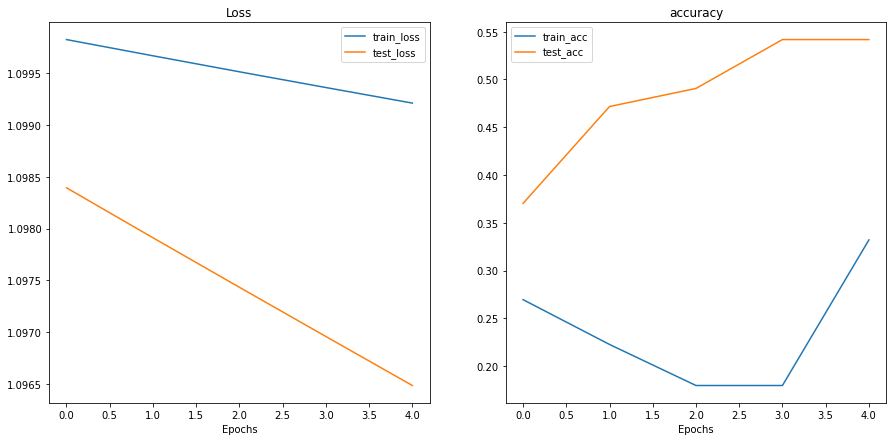

In [41]:
plot_loss_curves(model_0_results)

## Model 1: TinyVGG with Data Augmentation_ba___kdkkdkkdllkd

In [42]:
train_transform_trivial = transforms.Compose([
                                              transforms.Resize((64, 64)),
                                              transforms.TrivialAugmentWide(),
                                              transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
                                             transforms.Resize((64, 64)),
                                             transforms.ToTensor()
])


In [43]:
BATCH_SIZE = 32

# Load our data into Datasets

train_transform = torchvision.datasets.ImageFolder(root=train_dir,
                                                   transform=train_transform_trivial)
test_transform = torchvision.datasets.ImageFolder(root=test_dir,
                                                  transform=test_transform_simple)

# Turn our Datasets into Dataloaders

train_transform_data = torch.utils.data.DataLoader(train_transform,
                                                   BATCH_SIZE,
                                                   shuffle=True)
test_transform_data = torch.utils.data.DataLoader(test_transform,
                                                  BATCH_SIZE) 

In [44]:
img, label = next(iter(train_transform_data))
test_img, test_label = next(iter(test_transform_data))

img.shape, label.shape, test_img.shape, test_label.shape

(torch.Size([32, 3, 64, 64]),
 torch.Size([32]),
 torch.Size([32, 3, 64, 64]),
 torch.Size([32]))

In [45]:
# class TinyVGGModelV1(nn.Module):
#   def __init__(self, input_layer, hidden_layer, output_layer):
#     super().__init__()
#     self.conv_block_1 = nn.Sequential(
#         nn.Conv2d(input_layer, hidden_layer, kernel_size=3),
#         nn.ReLU(),
#         nn.Conv2d(hidden_layer, hidden_layer, kernel_size=3),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2))
#     self.conv_block_2 = nn.Sequential(
#         nn.Conv2d(hidden_layer, hidden_layer, kernel_size=3),
#         nn.ReLU(),
#         nn.Conv2d(hidden_layer, hidden_layer, kernel_size=3),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2)
#     )
#     self.classifier = nn.Sequential(
#         nn.Flatten(),
#         nn.Linear(hidden_layer*13*13,
#                   output_layer)
#     )
  
#   def forward(self, x):
#     x =self.conv_block_1(x)
#     # print(x.shape)
#     x =self.conv_block_2(x)
#     # print(x.shape)
#     x =self.classifier(x)
#     return x


model_1 = TinyVGGModel(3, 10, len(class_names)).to(device)
model_1

TinyVGGModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [46]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1_results = train_model(train_transform_data, test_transform_data, model_1, optimizer)

Epoch 0
 ----------------
Looked at 0 / 225 samples. 
Looked at 64 / 225 samples. 
Looked at 128 / 225 samples. 
Looked at 192 / 225 samples. 
Loss: 1.0945 | accuracy: 42.58% | Loss: 1.1027 | accuracy: 26.04%
Epoch 1
 ----------------
Looked at 0 / 225 samples. 
Looked at 64 / 225 samples. 
Looked at 128 / 225 samples. 
Looked at 192 / 225 samples. 
Loss: 1.0944 | accuracy: 42.58% | Loss: 1.1027 | accuracy: 26.04%
Epoch 2
 ----------------
Looked at 0 / 225 samples. 
Looked at 64 / 225 samples. 
Looked at 128 / 225 samples. 
Looked at 192 / 225 samples. 
Loss: 1.1002 | accuracy: 30.47% | Loss: 1.1027 | accuracy: 26.04%
Epoch 3
 ----------------
Looked at 0 / 225 samples. 
Looked at 64 / 225 samples. 
Looked at 128 / 225 samples. 
Looked at 192 / 225 samples. 
Loss: 1.0947 | accuracy: 42.58% | Loss: 1.1027 | accuracy: 26.04%
Epoch 4
 ----------------
Looked at 0 / 225 samples. 
Looked at 64 / 225 samples. 
Looked at 128 / 225 samples. 
Looked at 192 / 225 samples. 
Loss: 1.1003 | accura

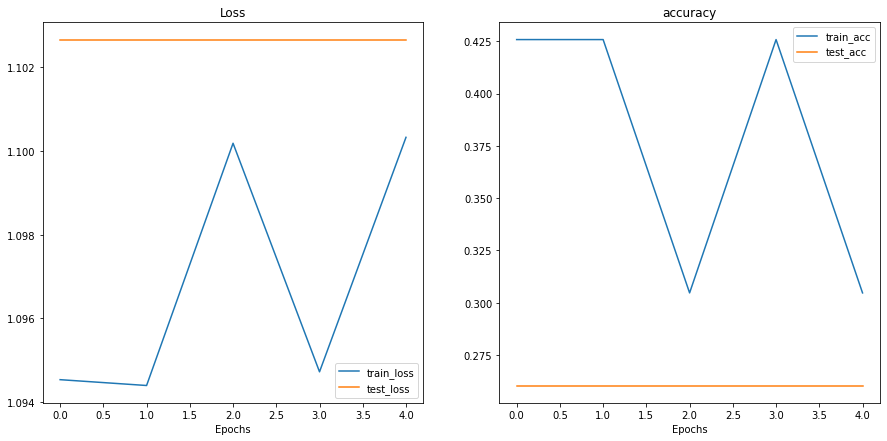

In [47]:
plot_loss_curves(model_1_results)

In [48]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.099819,0.269531,1.098392,0.370265
1,1.099663,0.222656,1.097911,0.471591
2,1.099509,0.179688,1.097434,0.490530
3,1.099358,0.179688,1.096960,0.541667
4,1.099208,0.332031,1.096488,0.541667


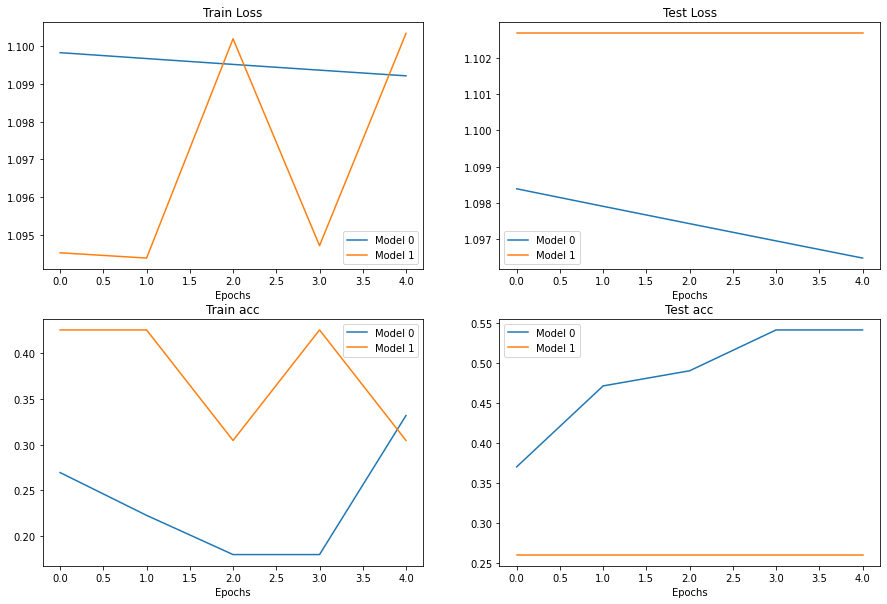

In [49]:
plt.figure(figsize=(15, 10))

epochs = range(len(model_0_df))

plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend();

plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend();

plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train acc")
plt.xlabel("Epochs")
plt.legend();

plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test acc")
plt.xlabel("Epochs")
plt.legend();